<a href="https://colab.research.google.com/github/KayalvizhiT513/Gradient_Descent_Comparison/blob/main/Gradient_Descent_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import csv

# Step 1: Initialize weights and learning rate
w_0 = 0.8260560647266798
w_1 = 0.5782539087214469
learning_rate = 0.01

# Step 2: Load data from CSV file
data = np.genfromtxt('randXY.csv', delimiter=',', skip_header=1)  # Adjust the filename accordingly

# Extract X and Y from the loaded data
X = data[:, 0]  # Assuming the first column is X
Y = data[:, 1]  # Assuming the second column is Y

print("Initial w0: ", w_0, "\n Initial w1: ", w_1)

Initial w0:  0.8260560647266798 
 Initial w1:  0.5782539087214469


In [2]:
X[:6]

array([0.75516916, 0.70479889, 0.74729347, 0.78506325, 0.34401043,
       0.45642158])

In [3]:
Y[:6]

array([8.46135565, 8.1760378 , 8.54844527, 8.64153212, 6.2636315 ,
       7.22811533])

In [4]:
def percentage_difference(value1, value2):
    return (np.abs(value1 - value2) / ((value1 + value2) / 2)) * 100

In [9]:
import matplotlib.pyplot as plt

# Function to plot epoch vs. loss
def plot_loss_vs_epoch(loss_history, algorithm_name):
    plt.plot(range(len(loss_history)), loss_history, label=algorithm_name)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'{algorithm_name} - Epoch vs. Loss')
    plt.legend()
    plt.show()

In [16]:
# Step 3: Define the gradient descent function with updated stopping criteria
def gradient_descent(X, Y, w0, w1, learning_rate, epochs=7000, tol=1, consecutive_instances=10):
    n = len(X)
    count = 0
    prev_loss = float('inf')

    for epoch in range(epochs):
        # Calculate predictions and loss
        predictions = w0 + w1 * X
        overall_loss = np.mean((Y - predictions)**2)

        # Calculate gradients
        gradient_w0 = -2 * np.mean(Y - predictions)
        gradient_w1 = -2 * np.mean((Y - predictions) * X)

        # Update weights
        w0 -= learning_rate * gradient_w0
        w1 -= learning_rate * gradient_w1

        precent_diff = percentage_difference(prev_loss, overall_loss)
        if precent_diff < tol:
          count += 1
        else:
          count = 0

        # Print loss for monitoring
        if epoch % 500 == 0:
            print(f"Epoch {epoch}, Loss: {overall_loss}")

        # Update the stopping criteria to consider non-inf values
        if count >= consecutive_instances:
            print(f"Epoch {epoch}, Loss: {overall_loss}")
            print("Converged! ")
            break

        # Append loss to the history
        loss_history_gd.append(overall_loss)

        # Update previous loss for the next iteration
        prev_loss = overall_loss

    return w0, w1

# Step 4: Run gradient descent with updated stopping criteria
w_0 = 0.8260560647266798
w_1 = 0.5782539087214469
learning_rate = 0.5
loss_history_gd = []
w0, w1 = gradient_descent(X, Y, w_0, w_1, learning_rate)
print(f"Final weights: w0={w0}, w1={w1}")


Epoch 0, Loss: 39.041559980585546
Epoch 48, Loss: 0.02137499378987098
Converged! 
Final weights: w0=4.790127670185706, w1=4.926483055604777


<ipython-input-4-d4fdf7de7d20>:2: RuntimeWarning: invalid value encountered in double_scalars
  return (np.abs(value1 - value2) / ((value1 + value2) / 2)) * 100


In [18]:
# Step 3: Define SGD function
def sgd_one_sample(X, Y, w0, w1, learning_rate, epochs=6000, tol=1, consecutive_instances=10):
    n = len(X)
    prev_loss = float('inf')
    count = 0

    for epoch in range(epochs):
        for i in range(n):
            # Select one random data point
            random_index = np.random.randint(0, n)
            x_i = X[random_index]
            y_i = Y[random_index]

            # Calculate prediction and loss for the selected point
            prediction = w0 + w1 * x_i
            loss = (y_i - prediction)**2

            # Calculate gradients
            gradient_w0 = -2 * (y_i - prediction)
            gradient_w1 = -2 * (y_i - prediction) * x_i

            # Update weights
            w0 -= learning_rate * gradient_w0
            w1 -= learning_rate * gradient_w1

        # Calculate overall loss for monitoring
        predictions = w0 + w1 * X
        overall_loss = np.mean((Y - predictions)**2)

        percent_diff = percentage_difference(prev_loss, overall_loss)
        if percent_diff < tol:
          count += 1
        else:
          count = 0

        # Print loss for monitoring
        if epoch % 500 == 0:
            print(f"Epoch {epoch}, Loss: {overall_loss}")

        # Update the stopping criteria to consider non-inf values
        if count >= consecutive_instances:
            print(f"Epoch {epoch}, Loss: {overall_loss}")
            print("Converged! ")
            break

        # Append loss to the history
        loss_history_sgd_one_sample.append(overall_loss)

        # Update previous loss for the next iteration
        prev_loss = overall_loss

    return w0, w1

# Step 4: Run SGD with one training sample at a time
w_0 = 0.8260560647266798
w_1 = 0.5782539087214469
learning_rate = 0.01
loss_history_sgd_one_sample = []
w0_sgd_one_sample, w1_sgd_one_sample = sgd_one_sample(X, Y, w_0, w_1, learning_rate)
print(f"Final weights for SGD with one sample: w0={w0_sgd_one_sample}, w1={w1_sgd_one_sample}")

<ipython-input-4-d4fdf7de7d20>:2: RuntimeWarning: invalid value encountered in double_scalars
  return (np.abs(value1 - value2) / ((value1 + value2) / 2)) * 100


Epoch 0, Loss: 0.039864084576651436
Epoch 50, Loss: 0.021122286798773218
Converged! 
Final weights for SGD with one sample: w0=4.7714820535789535, w1=4.986509160677629


In [20]:
# Step 3: Define SGD with batches function
def sgd_batches(X, Y, w0, w1, learning_rate, batch_size=10, epochs=5000, tol=1, consecutive_instances=10):
    n = len(X)
    prev_loss = float('inf')
    count = 0

    for epoch in range(epochs):
        # Shuffle the data indices
        indices = np.arange(n)
        np.random.shuffle(indices)

        # Iterate through batches
        for i in range(0, n, batch_size):
            batch_indices = indices[i:i+batch_size]
            x_batch = X[batch_indices]
            y_batch = Y[batch_indices]

            # Calculate predictions and loss for the batch
            predictions = w0 + w1 * x_batch
            loss = np.mean((y_batch - predictions)**2)

            # Calculate gradients
            gradient_w0 = -2 * np.mean(y_batch - predictions)
            gradient_w1 = -2 * np.mean((y_batch - predictions) * x_batch)

            # Update weights
            w0 -= learning_rate * gradient_w0
            w1 -= learning_rate * gradient_w1

        # Calculate overall loss for monitoring
        predictions = w0 + w1 * X
        overall_loss = np.mean((Y - predictions)**2)

        # Print overall loss for monitoring
        if epoch % 500 == 0:
            print(f"Epoch {epoch}, Loss: {overall_loss}")

        # Stopping criteria
        percent_diff = percentage_difference(prev_loss, overall_loss)
        if percent_diff < tol:
          count += 1
        else:
          count = 0

        # Print loss for monitoring
        if epoch % 500 == 0:
            print(f"Epoch {epoch}, Loss: {overall_loss}")

        # Update the stopping criteria to consider non-inf values
        if count >= consecutive_instances:
            print(f"Epoch {epoch}, Loss: {overall_loss}")
            print("Converged! ")
            break

        # Append loss to the history
        loss_history_sgd_batches.append(overall_loss)

        # Update previous loss for the next iteration
        prev_loss = overall_loss

    return w0, w1

# Step 4: Run SGD with batches of 10 samples
w_0 = 0.8260560647266798
w_1 = 0.5782539087214469
learning_rate = 0.01
loss_history_sgd_batches = []
w0_sgd_batches, w1_sgd_batches = sgd_batches(X, Y, w_0, w_1, learning_rate)
print(f"Final weights for SGD with batches: w0={w0_sgd_batches}, w1={w1_sgd_batches}")

Epoch 0, Loss: 0.46736721561318684
Epoch 0, Loss: 0.46736721561318684
Epoch 31, Loss: 0.021003144454375487
Converged! 
Final weights for SGD with batches: w0=4.768641926304484, w1=4.96587194004375


<ipython-input-4-d4fdf7de7d20>:2: RuntimeWarning: invalid value encountered in double_scalars
  return (np.abs(value1 - value2) / ((value1 + value2) / 2)) * 100


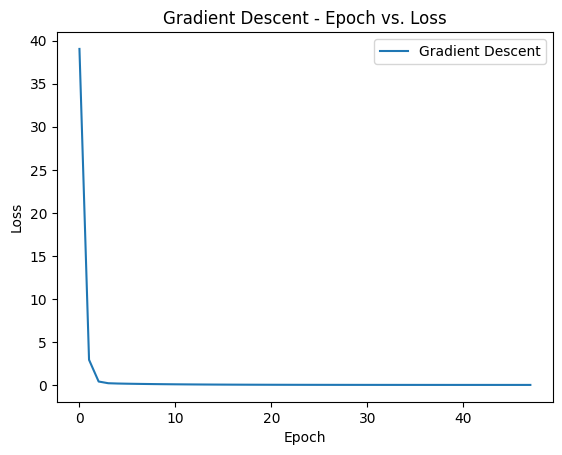

In [17]:
# Plot the loss vs. epoch graph for gradient descent
plot_loss_vs_epoch(loss_history_gd, 'Gradient Descent')


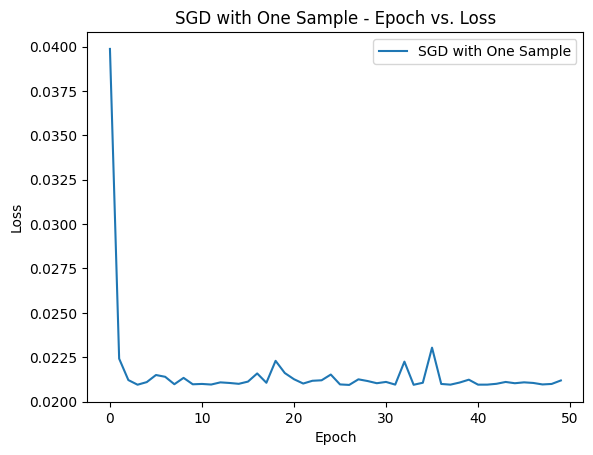

In [19]:
# Plot the loss vs. epoch graph for SGD with one sample
plot_loss_vs_epoch(loss_history_sgd_one_sample, 'SGD with One Sample')



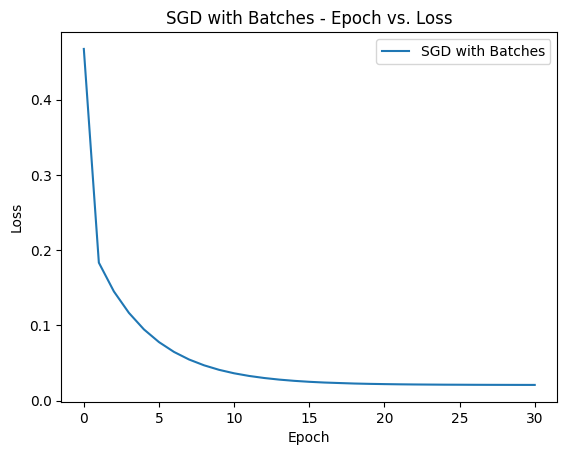

In [21]:
# Plot the loss vs. epoch graph for SGD with batches
plot_loss_vs_epoch(loss_history_sgd_batches, 'SGD with Batches')